# 1. 합성곱 신경망 이해

## 1.1 합성곱 연산

### 합성곱 연산

합성곱 구현

In [1]:
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

flip() 함수를 이용한 배열 뒤집기

In [2]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [3]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


넘파이의 점 곱으로 합성곱 연산

In [5]:
N = len(x)
F = len(w_r)
NUM = N - F + 1
for i in range(NUM):
    print(np.sum(x[i:i+4]*w_r), end=" ")

63 48 49 28 21 20 

In [7]:
print(x[0:4].shape)
print(w_r.shape)

(4,)
(4,)


In [8]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r), end=" ")

63 48 49 28 21 20 

In [9]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)), end = " ")

[63] [48] [49] [28] [21] [20] 

싸이파이로 합성곱 수행

In [10]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

싸이파이로 교차상관 수행

In [11]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

풀 패딩

In [12]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

세임 패딩

In [13]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

2차원 배열에서 합성곱 수행 ( mode='valid' )

In [14]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], [0, 0]])
from scipy.signal import correlate2d
correlate2d(x, w, mode='valid')

array([[ 2,  4],
       [ 8, 10]])

2차원 배열에서 합성곱 수행 ( mode='same' )

In [15]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

### 케라스의 Conv2D를 이용한 합성곱 연산

이미지 초기화(4차원 배열)

In [ ]:
!pip install tensorflow

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image)
print(image.numpy())
print(image.shape)

tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


이미지 시각화

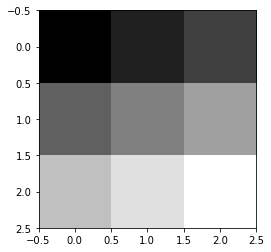

In [21]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')  #(1,3,3,1) => (3,3)
plt.show()

Conv2D를 이용한 합성곱(세임 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[11.999999 16.        9.      ]
 [24.       28.       15.      ]
 [14.999999 17.        8.999999]]


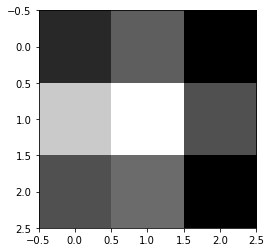

In [26]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

Conv2D를 이용한 합성곱(벨리드 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


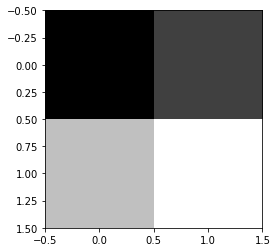

In [28]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

필터가 3개인 경우 합성곱 연산

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d.shape (1, 2, 2, 3)
[[[[ 12. 120. -12.]
   [ 16. 160. -16.]]

  [[ 24. 240. -24.]
   [ 28. 280. -28.]]]]
[[12. 16.]
 [24. 28.]]
[[120. 160.]
 [240. 280.]]
[[-12. -16.]
 [-24. -28.]]


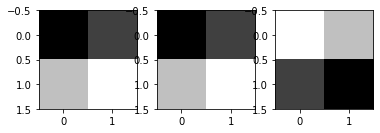

In [33]:
print("image.shape", image.shape)
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy())
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(2,2))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(2,2), cmap='gray')
plt.show()

#### 축교환 예제

In [36]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.swapaxes(a, 0, 3)
print(b)

[[[[ 0  8]
   [ 2 10]]

  [[ 4 12]
   [ 6 14]]]


 [[[ 1  9]
   [ 3 11]]

  [[ 5 13]
   [ 7 15]]]]


In [37]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.swapaxes(a, 1, 3)
print(b)

[[[[ 0  4]
   [ 2  6]]

  [[ 1  5]
   [ 3  7]]]


 [[[ 8 12]
   [10 14]]

  [[ 9 13]
   [11 15]]]]


In [40]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.swapaxes(a, 2,3)
print(b)

[[[[ 0  2]
   [ 1  3]]

  [[ 4  6]
   [ 5  7]]]


 [[[ 8 10]
   [ 9 11]]

  [[12 14]
   [13 15]]]]


이미지의 채널이 3개인 경우( weight도 채널이 3개임)

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1,1,1],[2,2,2],[3,3,3]],
                      [[4,4,4],[5,5,5],[6,6,6]],
                      [[7,7,7],[8,8,8],[9,9,9]]]], dtype=np.float32)
print(image.shape)
weight = np.array([[[[1],[2],[3]],[[1],[2],[3]]],[[[1],[2],[3]],[[1],[2],[3]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d)
# feature_maps = np.swapaxes(conv2d, 0, 3)
# for i, feature_map in enumerate(feature_maps):
#     print(feature_map.reshape(3,3))
#     plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
# plt.show()

그림이 5x5 이고 채널이 3개인 경우

In [42]:
image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)

print(image.shape)
maps = np.swapaxes(image, 0, 3)
for i, map in enumerate(maps):
    print(map.reshape(5,5))

(1, 5, 5, 3)
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


weight 3x3 이고 이미지가 채널 3이므로 weight도 채널 3개이다.

In [44]:
weight = np.array( [ 
                     [[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
                     [[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
                     [[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
                   ] )
# maps = np.swapaxes(weight, 1, 2)
# maps = np.swapaxes(maps, 0, 1)

maps = np.transpose(weight,(2,0,1,3))
for i, map in enumerate(maps):
    print(map.reshape(3,3))

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [45]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (2,0,1,3))
print(b)

[[[[ 0  1]
   [ 4  5]]

  [[ 8  9]
   [12 13]]]


 [[[ 2  3]
   [ 6  7]]

  [[10 11]
   [14 15]]]]


In [46]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (3,0,1,2))
print(b)

[[[[ 0  2]
   [ 4  6]]

  [[ 8 10]
   [12 14]]]


 [[[ 1  3]
   [ 5  7]]

  [[ 9 11]
   [13 15]]]]


In [47]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (3,1,0,2))
print(b)

[[[[ 0  2]
   [ 8 10]]

  [[ 4  6]
   [12 14]]]


 [[[ 1  3]
   [ 9 11]]

  [[ 5  7]
   [13 15]]]]


합성곱 연산(벨리드 패딩 사용)

In [48]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


필터가 2개이고 채널이 3인 경우

swapaxes를 이용한 시각화

In [49]:
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )
maps = np.swapaxes(weight, 1, 2)
maps = np.swapaxes(maps, 0, 1)

for map in maps:
    map = np.swapaxes(map, 1, 2)
    map = np.swapaxes(map, 0, 1)
    for filter in map:
       print(filter)

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


transpose를 이용한 시각화

In [50]:
# (3,3,3,2) => (3,2,3,3)
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

maps = np.transpose(weight, (2,3,0,1) )

for map in maps:
    for filter in map:
       print(filter)

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


합성곱 연산( 필터 2개, 채널 3개, 벨리드 패딩 )

In [51]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # ( 1,3,3,2)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


3차원 배열 축교환 예제

In [52]:
a = np.arange(12).reshape(3,2,2)
print(a.shape)
print(a)
b = np.swapaxes(a, 0, 1)
print(b)

(3, 2, 2)
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[[ 0  1]
  [ 4  5]
  [ 8  9]]

 [[ 2  3]
  [ 6  7]
  [10 11]]]


In [53]:
a = np.arange(12).reshape(3,2,2)
print(a.shape)
print(a)
b = np.swapaxes(a, 1, 2)
print(b)

(3, 2, 2)
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[[ 0  2]
  [ 1  3]]

 [[ 4  6]
  [ 5  7]]

 [[ 8 10]
  [ 9 11]]]


In [54]:
a = np.arange(12).reshape(3,2,2)
print(a.shape)
print(a)
b = np.swapaxes(a, 0, 2)
print(b)

(3, 2, 2)
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[[ 0  4  8]
  [ 2  6 10]]

 [[ 1  5  9]
  [ 3  7 11]]]


4차원 배열 축교환 예제

In [55]:
a = np.arange(16).reshape(2,2,2,2)
print(a.shape)
print(a)
b = np.swapaxes(a, 0, 3)
print(b)

(2, 2, 2, 2)
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]

  [[12 13]
   [14 15]]]]
[[[[ 0  8]
   [ 2 10]]

  [[ 4 12]
   [ 6 14]]]


 [[[ 1  9]
   [ 3 11]]

  [[ 5 13]
   [ 7 15]]]]


### 풀링 연산

strides=1, padding='valid' 인 경우

In [56]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


strides=1, padding='same' 인 경우

In [58]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [64]:
temp = np.arange(16).reshape(1,4,4,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy())
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool.numpy())

(1, 4, 4, 1)
[[[[ 0.]
   [ 1.]
   [ 2.]
   [ 3.]]

  [[ 4.]
   [ 5.]
   [ 6.]
   [ 7.]]

  [[ 8.]
   [ 9.]
   [10.]
   [11.]]

  [[12.]
   [13.]
   [14.]
   [15.]]]]
(1, 2, 2, 1)
[[[[ 5.]
   [ 7.]]

  [[13.]
   [15.]]]]


In [66]:
temp = np.arange(9).reshape(1,3,3,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy())
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool)

(1, 3, 3, 1)
[[[[0.]
   [1.]
   [2.]]

  [[3.]
   [4.]
   [5.]]

  [[6.]
   [7.]
   [8.]]]]
(1, 1, 1, 1)
tf.Tensor([[[[4.]]]], shape=(1, 1, 1, 1), dtype=float32)


Loading MNIST Data

(60000, 28, 28)
(28, 28)
<class 'numpy.ndarray'>


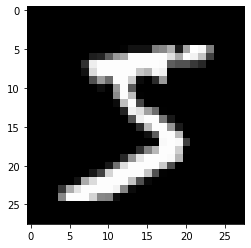

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

print( train_images.shape)  # (60000,28,28)
img = train_images[0]         
print(img.shape)            # (28,28)
print(type(img))
plt.imshow( img, cmap='gray')
plt.show()

합성곱 연산 시각화

weight.shape (3, 3, 3, 2)
conv2d.shape (1, 14, 14, 5)


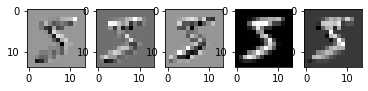

In [83]:
img = img.reshape(-1,28,28,1)   # (1,28,28,1)
img = tf.convert_to_tensor(img)

print("weight.shape", weight.shape)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)    
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
                             strides=(2,2), kernel_initializer=weight_init)(img)  # (3,3,1,5)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

weight.shape (3, 3, 3, 2)
conv2d.shape (1, 26, 26, 5)


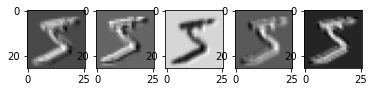

In [85]:
img = img.reshape(-1,28,28,1)   # (1,28,28,1)
img = tf.convert_to_tensor(img)

print("weight.shape", weight.shape)
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)    
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=3, padding='valid', 
                              kernel_initializer=weight_init)(img)  # (3,3,1,5)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(26,26), cmap='gray')
plt.show()

맥스 풀링 연산 시각화

(1, 13, 13, 5)


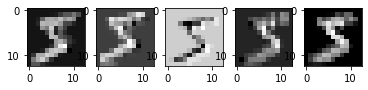

In [88]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(13,13), cmap='gray')
plt.show()

### 활성화 함수

시그모이드 함수

(200,)


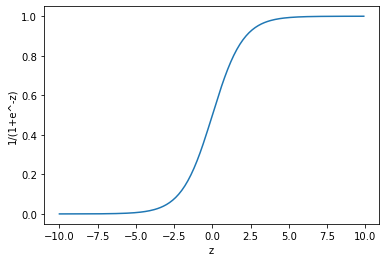

In [90]:
zs = np.arange(-10., 10., 0.1)
print(zs.shape)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

시그모이드 미분 그래프

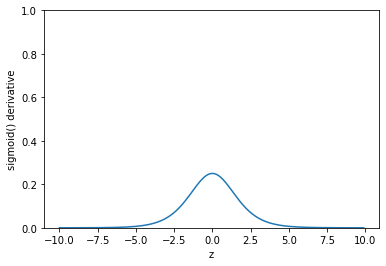

In [91]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

하이퍼 볼릭 탄젠트

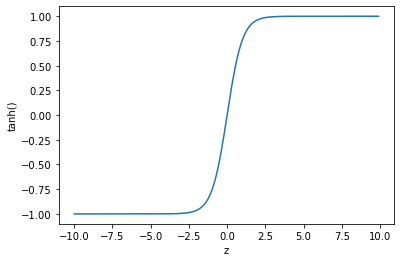

In [92]:
zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

하이퍼 볼릭 탄젠트 미분

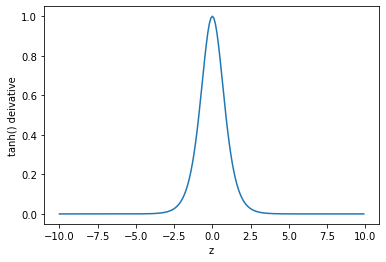

In [93]:
zs = np.arange(-10., 10., 0.1)
gs = [ (1-np.tanh(z))*(1+np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

렐루 함수

In [3]:
import numpy as np
def relu(x):
    return np.maximum(x, 0)

In [4]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

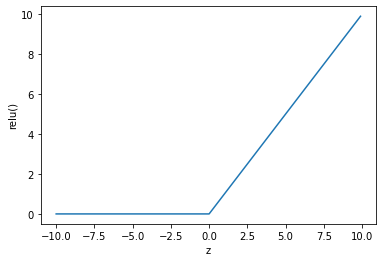

In [7]:
zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [8]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

## 1.2 합성곱 신경망 구현

In [23]:
def foo():
    a = np.arange(1000)
    print("foo()")
    return 10
    print("after")

n = foo()
print(n)

foo()
10


In [27]:
def foo():
    a = np.arange(1000)
    print("foo()")
    yield 10
    print("after")

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

<generator object foo at 0x0000023A04FD9040>
foo()
10
after


StopIteration: 

In [31]:
def foo():
    a = np.arange(3)
    print("foo()")
    for i in range(3):
        yield a[i:i+1]

for n in foo():
    print(n)

foo()
[0]
[1]
[2]


In [32]:
def foo():
    batch_size=10
    x = np.arange(100)
    bins = len(x) // batch_size                  

    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x[start:end] 

for n in foo():
    print(n)

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [61]:
x = np.array([10,11,12,13,14,15,16,17,18,19])
indexes = np.random.permutation(len(x))
# print(indexes)
print( x[indexes])

[12 14 16 10 18 11 17 13 19 15]


In [93]:
def foo():
    batch_size=10
    x = np.arange(105)
    bins = len(x) // batch_size    
    if (len(x) % batch_size) != 0 :
        bins += 1
    indexes = np.random.permutation(len(x))
    x = x[indexes]
    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x[start:end] 

for n in foo():
    print(n)

[ 65  42  39  61  89  24  69  66 104  82]
[55 79 33 58 54 37 28 90 60 86]
[101  94  62  22  40  88   8  45  99  17]
[ 10  57 103  68  34  47  52  12  27  23]
[100  56  20  51  18  46   1  41  81  76]
[85 26 29 14  0 93 63 98 44 36]
[31 43 13 75 96 67 80 25 48 21]
[ 35  50  53 102   5  73   4   7  32  92]
[ 3 19 15 72 77 74 16 97 95 11]
[ 9 78 83 49 30 87  2 38 71 91]
[64 59 84  6 70]


In [116]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)   # (128,28,28,1)
#         print('self.conv_w.shape',self.conv_w.shape)  # (3,3,1,10)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)  # (128,28,28,10)
#         print('c_out[0]=',c_out[0])
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)  # (128,28,28,10)
#         print('r_out[0]=',r_out[0])
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)  # (128,14,14,10)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)  # (128,1960)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
#         print('z1.shape',z1.shape)  # (128,1960)(1960,100) + (100,) = (128,100)
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
#         print('z2.shape',z2.shape)  # (128,100)(100,10) + (10,) = (128,10)
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
#                 break
            
#             break
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)
        
#         print("loss=", loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

자동 미분의 사용 방법

In [94]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니댜.
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


fashion mnist 로드

In [96]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

훈련 데이터 검증 데이터 분리

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

y_train 형상

In [98]:
print(y_train[0])
print(y_train.shape)

6
(48000,)


결과값 원-핫 인코딩 

In [99]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [100]:
print(y_train_encoded[0])
print(y_train_encoded.shape)
print(x_train.shape)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(48000, 10)
(48000, 28, 28)


그림 4차원 형상으로 변환

In [101]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [102]:
print(x_train.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)


입력 데이터 표준화 전처리하기

In [103]:
x_train = x_train / 255
x_val = x_val / 255

모델 훈련하기

In [117]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

훈련, 검증 손실 그래프 그리고 검증 세트의 정확도 확인

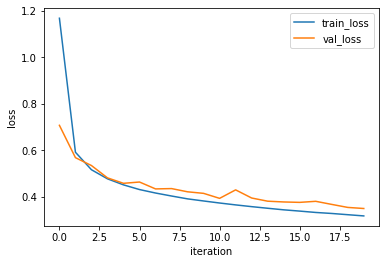

In [118]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

정확도

In [119]:
cn.score(x_val, y_val_encoded)

0.8811666666666667

### 1.3 케라스로 합성곱 신경망 구현

필요한 클래스들을 임포트하기

In [120]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

합성곱층 쌓기

In [122]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

풀링층 쌓기

In [123]:
conv1.add(MaxPooling2D((2, 2)))

완전 연결층에 주입할 수 있도록 특성 맵 펼치기

In [124]:
conv1.add(Flatten())

완전 연결층 쌓기

In [125]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

모델 구조 살펴보기

In [126]:
conv1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


모델 컴파일

In [127]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [128]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5933 - accuracy: 0.7964 - val_loss: 0.3137 - val_accuracy: 0.8882
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3162 - accuracy: 0.8857 - val_loss: 0.2836 - val_accuracy: 0.8959
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2599 - accuracy: 0.9066 - val_loss: 0.2708 - val_accuracy: 0.9062
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2224 - accuracy: 0.9190 - val_loss: 0.2592 - val_accuracy: 0.9074
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2050 - accuracy: 0.9247 - val_loss: 0.2485 - val_accuracy: 0.9131
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1837 - accuracy: 0.9322 - val_loss: 0.2538 - val_accuracy: 0.9110
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1650 - accuracy: 0.9395 - val_loss: 0.2512 - val_accuracy:

손실 그래프와 정확도 그래프

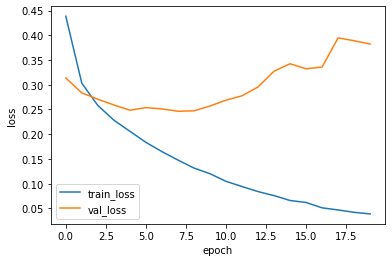

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

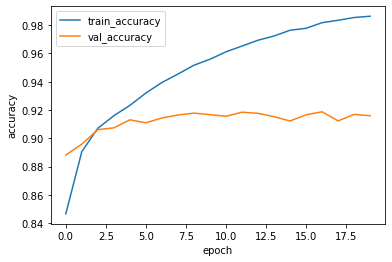

In [130]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### 드롭아웃 적용해 합성곱 신경망 구현

케라스로 만든 합성곱 신경망에 드롭아웃 적용하기

In [131]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

드롭아웃층 확인하기

In [132]:
conv2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

훈련하기

In [133]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6859 - accuracy: 0.7576 - val_loss: 0.3420 - val_accuracy: 0.8788
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3833 - accuracy: 0.8629 - val_loss: 0.3028 - val_accuracy: 0.8921
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3359 - accuracy: 0.8740 - val_loss: 0.2861 - val_accuracy: 0.8953
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3089 - accuracy: 0.8863 - val_loss: 0.2718 - val_accuracy: 0.9027
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2876 - accuracy: 0.8949 - val_loss: 0.2593 - val_accuracy: 0.9074
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2732 - accuracy: 0.8986 - val_loss: 0.2486 - val_accuracy: 0.9099
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2542 - accuracy: 0.9051 - val_loss: 0.2506 - val_accuracy:

손실 그래프와 정확도 그래프 그리기

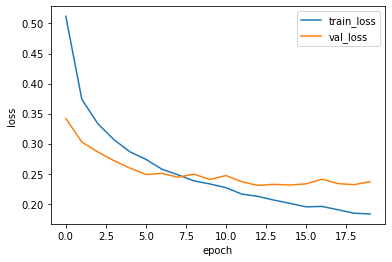

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

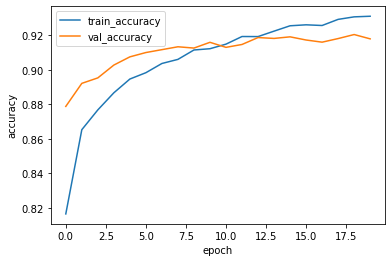

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()